In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df = pd.read_csv("Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
cat_columns = visa_df.select_dtypes(include='object').columns
num_columns = visa_df.select_dtypes(exclude='object').columns

**Bi Variant Analysis**

- We already seen Uni variant analysis

- We performed the categorical columns analysis

    - Frequency table (value counts)
    
    - Bar chart
    
    - Relative Frequency Table (Value counts Normalized form)
    
    - Pie Chart

- We performed the numerical column analysis

    - Histogram
    
    - Distribution plot
    
    - Box Plot
    
    - Outlier analyis
    
    - Filling the outliers
    
- Now we will do categorical-categorical analysis

- Numerical Vs Numerical Analysis

- Categorical-Numerical Analysis


**Categorical- Categorical**

- Lets Consider two columns

    - Continent
    
    - Case status

In [ ]:
# value counts 

In [5]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [6]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

- find the certfied observations continent wise

- Find the denied observations continent wise

In [10]:
# Step-1 : Make the first condition Continent == 'Asia'
# Step-2: make the Second condition case_status == 'certified'
# Step-3: make the third condition : con1&con2
# Step-4: Then retrieve the datframe and take the count

con1 = visa_df['continent'] == 'Asia'
con2 = visa_df['case_status'] == 'Certified'
con3 = con1&con2
len(visa_df[con3])

11012

In [ ]:
df1=pd.DataFrame()
df2=pd.

In [13]:
continents = visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in continents:
    con1 = visa_df['continent'] == i
    con2 = visa_df['case_status'] == 'Certified'
    con3 = visa_df['case_status'] == 'Denied'
    cert_con = con1&con2
    den_con = con1&con2
    cert_count = len(visa_df[cert_con])
    den_count = len(visa_df[den_con])
    print(f"The number of certified visa from {i} is: {cert_count}")
    print(f"The number of certified visa from {i} is: {den_count}")
    certified_list.append(cert_count)
    denied_list.append(den_count)

The number of certified visa from Asia is: 11012
The number of certified visa from Asia is: 11012
The number of certified visa from Africa is: 397
The number of certified visa from Africa is: 397
The number of certified visa from North America is: 2037
The number of certified visa from North America is: 2037
The number of certified visa from Europe is: 2957
The number of certified visa from Europe is: 2957
The number of certified visa from South America is: 493
The number of certified visa from South America is: 493
The number of certified visa from Oceania is: 122
The number of certified visa from Oceania is: 122


In [29]:
# DF

continents
certified_list
cols=['continents','Certified']
pd.DataFrame(zip(continents,certified_list),columns = cols)

,continents,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [24]:
continents
denied_list
cols=['continents','Denied']
df2 = pd.DataFrame(zip(continents,denied_list),columns = cols)
df2

,continents,Denied
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [28]:
cols = ['Certified','Denied']
df3 = pd.DataFrame(zip(certified_list,denied_list),index= continents,columns = cols)
df3

,Certified,Denied
Asia,11012,11012
Africa,397,397
North America,2037,2037
Europe,2957,2957
South America,493,493
Oceania,122,122


**Cross-Tab**

- The above dataframe we can make by using a method: **cross tab**
    
- It is available in pandas 

- It takes two arguments 

     - index
    
    - column
    
- pd.crosstab(index,column)

- In the above dataframe index column : **continent**
    
- In the above dataframe Data column : **case_status**

In [34]:
idx_column = visa_df['continent']
data_column = visa_df['case_status']
df4 = pd.crosstab(idx_column,data_column)
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

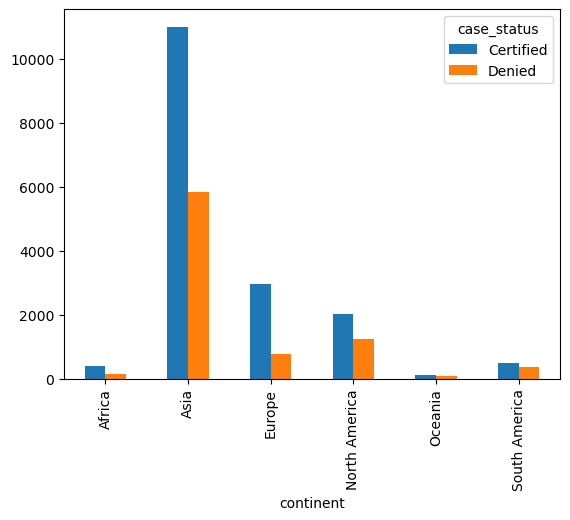

In [35]:
df4.plot(kind='bar')

In [ ]:
**Multivariant Analysis**

- Education 

- continent

- case status

- we already know from asia there are 11k accepted visa

- In that I want to further breakdown based on Education

- here also pd.crosstab

    - First fix your index of any one column out of three columns
    
    - Then keep two column in a list and pass as data column

<Axes: xlabel='continent'>

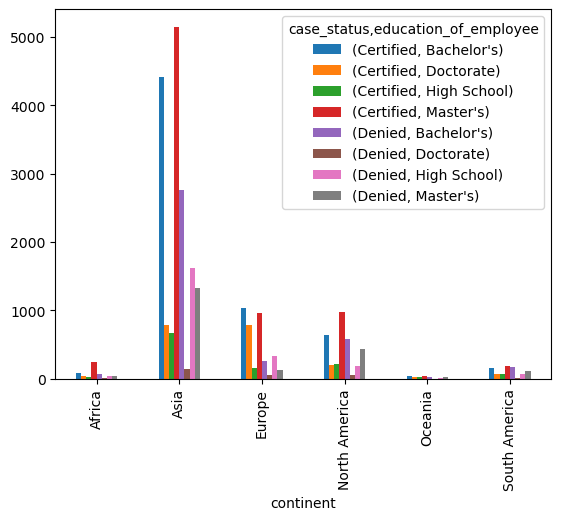

In [39]:
idx_column = visa_df['continent']
data_column = [visa_df['case_status'],visa_df['education_of_employee']]
df5 = pd.crosstab(idx_column,data_column)
df5.plot(kind='bar')

In [37]:
idx_column = [visa_df['continent'],visa_df['education_of_employee']]
data_column = visa_df['case_status']
df6 = pd.crosstab(idx_column,data_column)
df6

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

**Numerical vs Numerical**

- To understand Numerical column relation we need to plot sctter plots 

- Scatter plots gives the relation b/w two numerical columns

- Bar Chart - Pie Chart - Histogram - Scatter plots

- So sctter plots under matplotlib package 

- **plt.scatter**

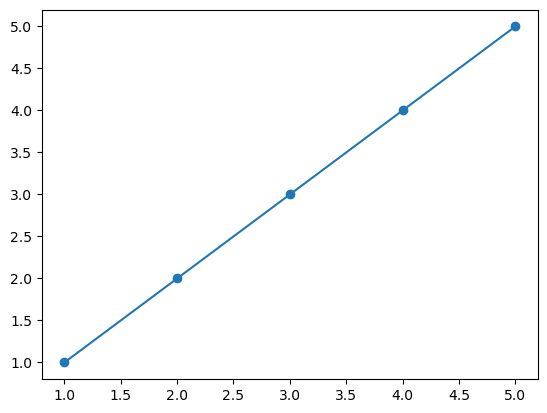

In [5]:
x=[1,2,3,4,5]
y= [1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

In [6]:
for i in x:
    print(i)

1
2
3
4
5


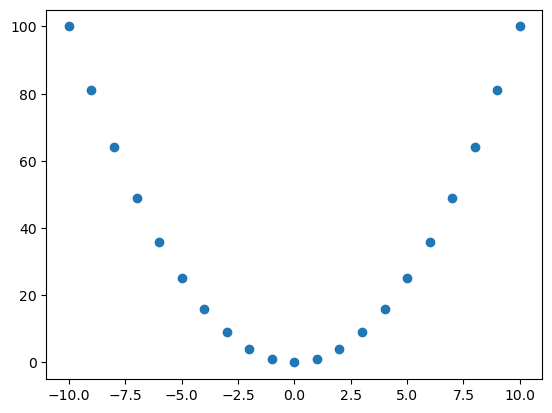

In [9]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot()
plt.show()

In [ ]:
# Step-1: read one numerical column
# Step-2: read second numerical column 
# Step-3: apply scatter plot

In [10]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

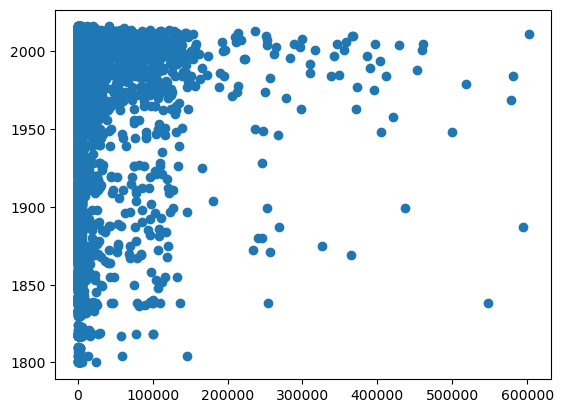

In [6]:
col1= visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)
plt.show()

In [ ]:
col=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']

Text(0, 0.5, 'prevailing_wage')

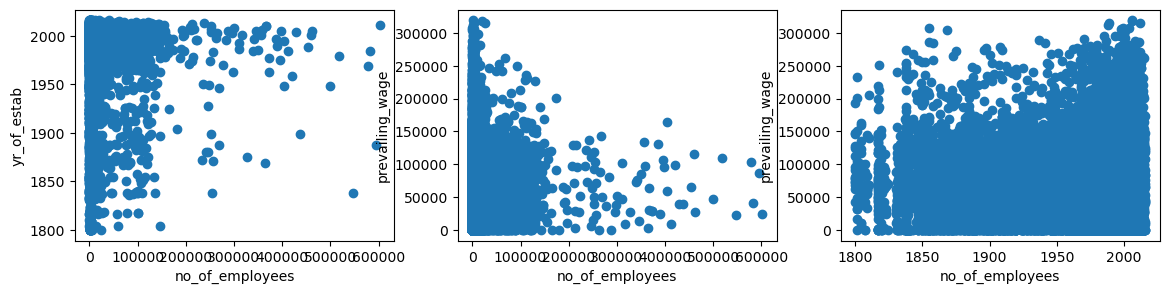

In [4]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
########################################
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
######################################
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')

In [ ]:
# Mean Deviation
# Absolute mean deviation 
# Variance
# Covariance
# Correlation Coefficient

- Implement the Covariance function

- Covariance vs Correlation:
    
         - Covariance will tell about the columns have relation or not
        
        - Covariance will explain about the relation status
        
        - Positive relation
        
        - Negative relation
        
        - No relation
        
        
    - Correlation tells about how much relation b/w two variables
    
    - It denotes with 'r'
        
    - r varies from -1 to 1
    
    - -1 to 0 indicates negative relation quantity
    
    - 0 to 1 indicates positive relation quantity
    
    - 0 indicates no relation
        

**Method name: corr**

In [16]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat Map**

- heat map is one of the important visualization method to show the matrix form of values

- It is under **Seaborn** package

- In every matrix we have highest value and lowest values available

- So heatmap will give the color visualizations

- Also it provides color bar - which color indicates which value

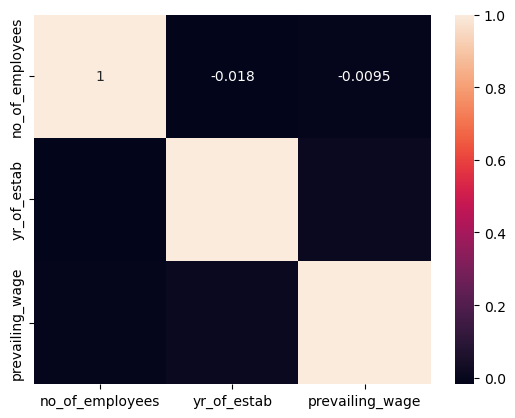

In [19]:
corr_data = visa_df.corr(numeric_only=True)
sns.heatmap(corr_data, annot=True)
plt.show()

In [ ]:
# Appply same thing for the bank dataset

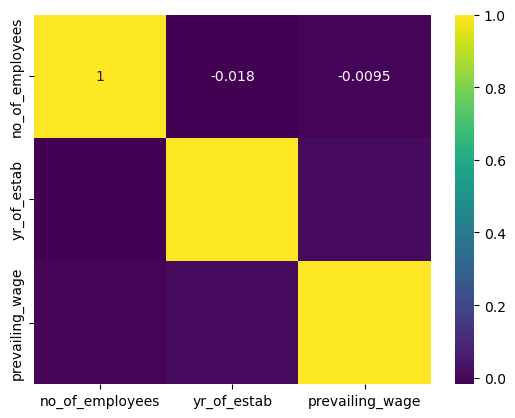

In [23]:
corr_data = visa_df.corr(numeric_only=True)
sns.heatmap(corr_data, annot=True,cmap='viridis')
plt.show()

- By seeing the graphs we might not say te relation status 

- So its best best practise to get the percentage of relation using correlation

- All 3 columns having approximately zero percentage of relation

- Which indicates all the columns having no relation 

- No relation means independent to each other

- In machine Learning models we expect the input columns should be independent to each other

- Correlation method gives matrix view

- We have 3 columns 3*3 total 9 fields

- if the data has 20 columns then 20*20 total 400 fields

- So always go with Heatmap visualization